In [56]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import backend as K

In [35]:
file_path = r"C:\Users\srile\OneDrive\Desktop\Medicinal Leaf Dataset\Medicinal Leaf Dataset\Segmented Medicinal Leaf Images"
name_class = os.listdir(file_path)
print(name_class)

['Alpinia Galanga (Rasna)', 'Amaranthus Viridis (Arive-Dantu)', 'Artocarpus Heterophyllus (Jackfruit)', 'Azadirachta Indica (Neem)', 'Basella Alba (Basale)', 'Brassica Juncea (Indian Mustard)', 'Carissa Carandas (Karanda)', 'Citrus Limon (Lemon)', 'Ficus Auriculata (Roxburgh fig)', 'Ficus Religiosa (Peepal Tree)', 'Hibiscus Rosa-sinensis', 'Jasminum (Jasmine)', 'Mangifera Indica (Mango)', 'Mentha (Mint)', 'Moringa Oleifera (Drumstick)', 'Muntingia Calabura (Jamaica Cherry-Gasagase)', 'Murraya Koenigii (Curry)', 'Nerium Oleander (Oleander)', 'Nyctanthes Arbor-tristis (Parijata)', 'Ocimum Tenuiflorum (Tulsi)', 'Piper Betle (Betel)', 'Plectranthus Amboinicus (Mexican Mint)', 'Pongamia Pinnata (Indian Beech)', 'Psidium Guajava (Guava)', 'Punica Granatum (Pomegranate)', 'Santalum Album (Sandalwood)', 'Syzygium Cumini (Jamun)', 'Syzygium Jambos (Rose Apple)', 'Tabernaemontana Divaricata (Crape Jasmine)', 'Trigonella Foenum-graecum (Fenugreek)']


In [36]:
filepaths = list(glob.glob(file_path+'/**/*.*'))
print(filepaths)

['C:\\Users\\srile\\OneDrive\\Desktop\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-001.jpg', 'C:\\Users\\srile\\OneDrive\\Desktop\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-002.jpg', 'C:\\Users\\srile\\OneDrive\\Desktop\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-003.jpg', 'C:\\Users\\srile\\OneDrive\\Desktop\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-004.jpg', 'C:\\Users\\srile\\OneDrive\\Desktop\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-005.jpg', 'C:\\Users\\srile\\OneDrive\\Desktop\\Medicinal Leaf Dataset\\Medicinal Leaf Dataset\\Segmented Medicinal Leaf Images\\Alpinia Galanga (Rasna)\\AG-S-006.jpg', 'C:\\Users\\srile\\OneDrive\\Desktop\\Medicin

In [37]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
print(labels)

['Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 'Alpinia Galanga (Rasna)', 

In [38]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)

Text(0.5, 0, 'Type')

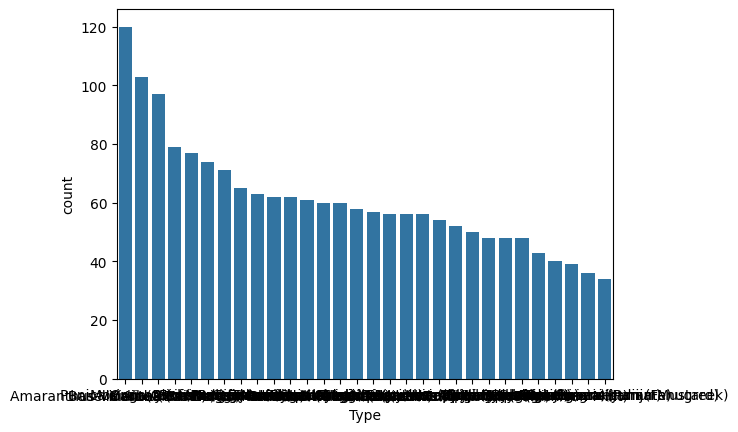

In [39]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')

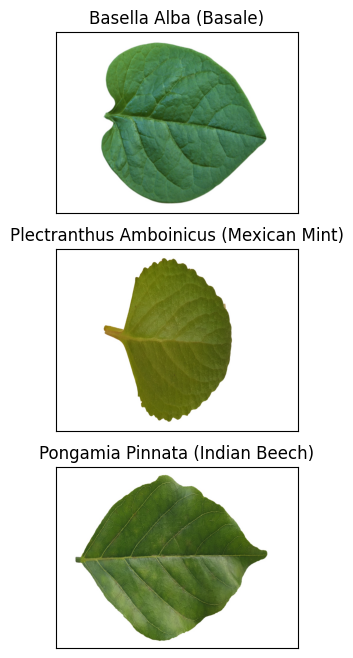

In [40]:
train, test = train_test_split(data, test_size=0.25, random_state=42)
fig, axes = plt.subplots(nrows=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])

In [41]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [42]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 1371 validated image filenames belonging to 30 classes.


In [43]:
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 458 validated image filenames belonging to 30 classes.


In [44]:
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)

Found 458 validated image filenames belonging to 30 classes.


In [45]:
pretrained_model = ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

In [46]:
inputs = pretrained_model.input

In [47]:
x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)
outputs = Dense(30, activation='softmax')(x)             #Important!
model = Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=3
)

Epoch 1/3
43/43 [==============================] - 39s 781ms/step - loss: 2.1528 - accuracy: 0.4471 - val_loss: 0.8986 - val_accuracy: 0.7969
Epoch 2/3
43/43 [==============================] - 28s 663ms/step - loss: 0.6029 - accuracy: 0.8344 - val_loss: 0.4993 - val_accuracy: 0.8712
Epoch 3/3
43/43 [==============================] - 28s 641ms/step - loss: 0.3258 - accuracy: 0.9168 - val_loss: 0.3276 - val_accuracy: 0.9148


In [49]:
model.save("model_resnet.h5")

C:\Users\srile\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


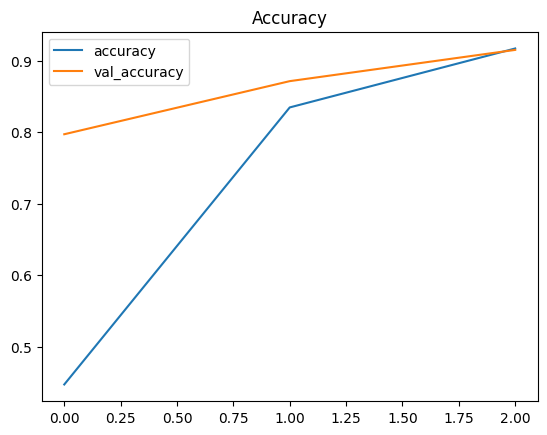

In [50]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

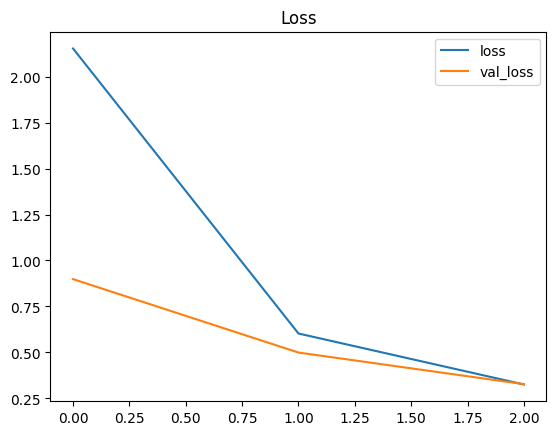

In [51]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [52]:
results = model.evaluate(test_gen, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.32762
Test Accuracy: 91.48%


In [53]:
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]
y_test = list(test.Label)

15/15 [==============================] - 14s 791ms/step


In [57]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [66]:
input_shape=(100,100,3),
n_classes=30

In [67]:
chanDim = -1
if K.image_data_format() == "channels_first":
    input_shape = (CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    batch_input_shape = (BATCH_SIZE, CHANNELS, IMAGE_SIZE, IMAGE_SIZE)
    chanDim = 1

In [70]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])


In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 conv2d_18 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 49, 49, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 21, 21, 64)       

In [78]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [80]:
history = model.fit(
    train_gen,
    batch_size=32,
    validation_data=valid_gen,
    verbose=1,
    epochs=50,
)


Epoch 1/50
43/43 [==============================] - 19s 430ms/step - loss: 2.0504 - accuracy: 0.3749 - val_loss: 2.0026 - val_accuracy: 0.3952
Epoch 2/50
43/43 [==============================] - 15s 360ms/step - loss: 1.8356 - accuracy: 0.4201 - val_loss: 1.6447 - val_accuracy: 0.5153
Epoch 3/50
43/43 [==============================] - 16s 365ms/step - loss: 1.7522 - accuracy: 0.4537 - val_loss: 1.8647 - val_accuracy: 0.4520
Epoch 4/50
43/43 [==============================] - 15s 349ms/step - loss: 1.5358 - accuracy: 0.5171 - val_loss: 1.5323 - val_accuracy: 0.5349
Epoch 5/50
43/43 [==============================] - 21s 484ms/step - loss: 1.4396 - accuracy: 0.5507 - val_loss: 1.4747 - val_accuracy: 0.5546
Epoch 6/50
43/43 [==============================] - 16s 375ms/step - loss: 1.3186 - accuracy: 0.5828 - val_loss: 1.8385 - val_accuracy: 0.4803
Epoch 7/50
43/43 [==============================] - 15s 354ms/step - loss: 1.2533 - accuracy: 0.5872 - val_loss: 2.0727 - val_accuracy: 0.4694

In [82]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(test_gen)
print(f"Test Accuracy: {round(scores[1],4)*100}%")

[INFO] Calculating model accuracy
15/15 [==============================] - 5s 336ms/step - loss: 1.4277 - accuracy: 0.6769
Test Accuracy: 67.69%


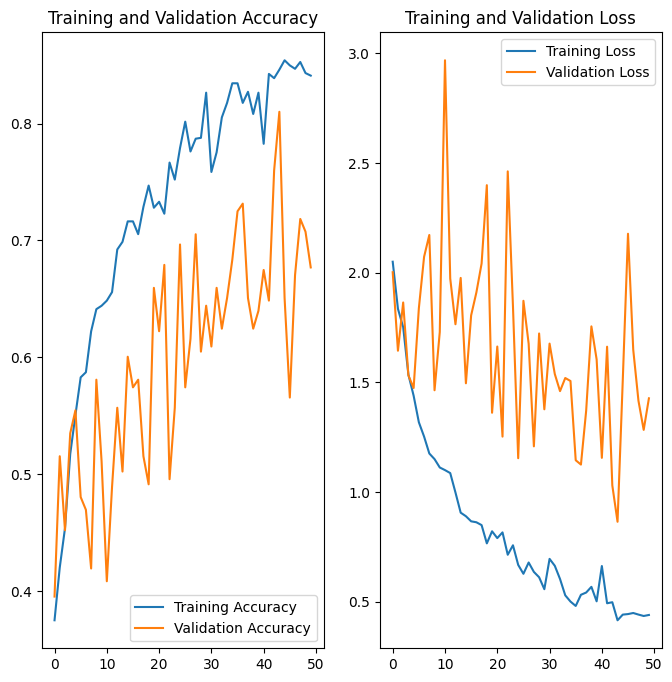

In [84]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [90]:
model.save("model_cnn.h5")

C:\Users\srile\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [2]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

In [5]:
model = tf.keras.applications.ResNet50(weights='imagenet')

In [6]:
# Load and preprocess the input image
img_path = 'testing/AG-S-049 copy 2.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 1s 1s/step
Predictions:
1: quill (0.40)
2: letter_opener (0.31)
3: cleaver (0.02)
